In [1]:
from mylib.dsp.route_decode import decode_routes
import pickle

if __name__ == '__main__':
    with open(r"E:\Data\Dsp_maze\10224\20231014\trace.pkl", 'rb') as handle:
        trace = pickle.load(handle)
    
    y_pred, y_test, x_test = decode_routes(trace, n_cross_times=12)
    print(y_pred)
    print(y_test)
    
    with open(r"E:\Data\Dsp_maze\10224\20231014\demo_decode_results.pkl", 'wb') as handle:
        pickle.dump([y_pred, y_test, x_test], handle)


In [2]:
from mylib.maze_utils3 import spike_nodes_transform
from mylib.maze_graph import CorrectPath_maze_1 as CP

x_test_converted = spike_nodes_transform(spike_nodes = x_test, nx = 12)

In [6]:
x_test, x_test_converted, y_pred, y_test.shape

(array([ 147.,  195.,  196., ..., 2109., 2110., 2159.]),
 array([  1,  13,  13, ..., 132, 132, 144], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 (22660,))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compute_accuracy(y_pred, y_test, x_test, CP):
    accuracy = np.zeros_like(CP)
    
    for i in range(len(CP)):
        n_all = np.where(x_test == CP[i])[0].shape[0]
        n_correct = np.where((y_pred == y_test) & (x_test == CP[i]))[0].shape[0]
        accuracy[i] = n_correct / n_all
        
    return accuracy

accuracy = compute_accuracy(y_pred, y_test, x_test_converted, CP)

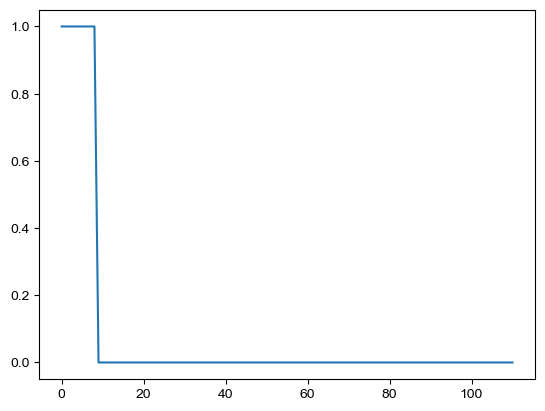

In [5]:
plt.plot(accuracy)